In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Training/Python/Pandas/Food data.csv')
display(df.head())
display(df.tail())

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
1817,1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT
1821,1821,5/10/2024,350.0,6,23.708015,51.351286,4,0,46.786860,intermediate,Vegetables


**Exploratory Data Analysis (EDA) Process**
**1- Data Cleaning**

In [6]:
# Data Shape
print("Data Shape:", df.shape)
# Data Types
print("\nData Types:")
print(df.dtypes)


Data Shape: (1822, 11)

Data Types:
ID                    int64
date                 object
meals_served        float64
kitchen_staff        object
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event        object
past_waste_kg       float64
staff_experience     object
waste_category       object
dtype: object


In [7]:
#missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values:
ID                    0
date                  0
meals_served         32
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64

Percentage of Missing Values:
ID                   0.000000
date                 0.000000
meals_served         1.756312
kitchen_staff        0.987925
temperature_C        0.000000
humidity_percent     0.878156
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.878156
staff_experience    18.496158
waste_category       1.152580
dtype: float64


In [8]:
#checking columns which have more than 50% missing values
missing_percentage[missing_percentage > 50]

,0


In [9]:
#checking columns which have between  30%-40% missing values
missing_percentage[missing_percentage > 30 - 40]

,0
ID,0.000000
date,0.000000
meals_served,1.756312
kitchen_staff,0.987925
temperature_C,0.000000
humidity_percent,0.878156
day_of_week,0.000000
special_event,0.000000
past_waste_kg,0.878156
staff_experience,18.496158


In [10]:
#checking columns which have between  20%-30% missing values
missing_percentage[missing_percentage > 20 - 30]

,0
ID,0.000000
date,0.000000
meals_served,1.756312
kitchen_staff,0.987925
temperature_C,0.000000
humidity_percent,0.878156
day_of_week,0.000000
special_event,0.000000
past_waste_kg,0.878156
staff_experience,18.496158


In [11]:
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [12]:
numerical_cols= df.select_dtypes(include=['number'])
numerical_cols.columns

Index(['ID', 'meals_served', 'temperature_C', 'humidity_percent',
       'day_of_week', 'past_waste_kg'],
      dtype='object')

In [13]:
obj_col=df.select_dtypes(include=['object'])
obj_col.columns

Index(['date', 'kitchen_staff', 'special_event', 'staff_experience',
       'waste_category'],
      dtype='object')

In [14]:

# Value Distributions for Numerical Columns
numerical_cols = df.select_dtypes(include=['number'])
print("\nSummary Statistics for Numerical Columns:")
numerical_cols.describe()


Summary Statistics for Numerical Columns:


,ID,meals_served,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1790.000000,1822.000000,1806.000000,1822.00000,1806.000000
mean,910.500000,373.512849,22.189280,60.791257,3.01427,26.997534
std,526.110413,494.791973,8.919939,17.326232,2.00899,12.791891
min,0.000000,100.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,211.250000,15.684259,46.035158,1.00000,15.990760
50%,910.500000,306.000000,22.115040,61.634935,3.00000,26.832569
75%,1365.750000,407.000000,28.807494,75.789317,5.00000,38.116308
max,1821.000000,4730.000000,60.000000,89.982828,6.00000,49.803703


In [15]:
df['meals_served'].value_counts()

,count
meals_served,
259.0,14
352.0,14
485.0,14
291.0,14
198.0,13
...,...
117.0,2
4680.0,1
284.0,1


In [16]:
df['kitchen_staff'].value_counts()

,count
kitchen_staff,
12,143
5,138
10,130
13,127
9,127
15,123
18,121
14,117
7,117


In [17]:
df['humidity_percent'].value_counts()

,count
humidity_percent,
69.316945,4
81.983191,4
75.554924,4
42.931792,4
51.622669,4
...,...
78.496526,1
61.633571,1
61.352383,1


In [18]:
df['staff_experience'].value_counts()

,count
staff_experience,
Beginner,381
Intermediate,368
intermediate,366
EXPERT,346
Pro,24


In [19]:
df['waste_category'].value_counts()

,count
waste_category,
MEAT,419
dairy,351
Vegetables,350
MeAt,335
GRAINS,317
Barley,15
Wheat,14


In [20]:
df['temperature_C'].value_counts()

,count
temperature_C,
-10.000000,24
60.000000,18
34.418131,2
20.567228,2
31.145476,2
...,...
22.022596,2
11.782007,2
16.214506,2


In [21]:
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    #print(f"\nValue Counts for {col}:")
    #print(df[col].value_counts())
    print(f"\nUnique values for {col}:")
    print(df[col].unique())


Unique values for date:
['12/19/2022' '11/21/2023' '2/1/2022' '3/19/2023' '7/18/2022' '3/2/2023'
 '4/18/2022' '12/16/2023' '7/7/2023' '11/7/2023' '6/8/2022' '4/21/2023'
 '1/25/2022' '9/10/2023' '4/29/2023' '6/3/2024' '10/13/2023' '9/2/2022'
 '4/27/2024' '9/9/2024' '4/8/2024' '7/25/2023' '3/1/2022' '10/18/2022'
 '3/12/2022' '12/11/2022' '7/4/2022' '5/22/2022' '1/26/2023' '5/7/2023'
 '4/6/2024' '4/12/2022' '1/20/2024' '7/6/2023' '11/3/2022' '9/13/2024'
 '11/18/2022' '3/10/2024' '1/1/2024' '11/9/2023' '10/16/2023' '3/18/2022'
 '7/12/2022' '3/28/2022' '4/4/2023' '2/18/2022' '7/7/2024' '1/4/2022'
 '11/6/2022' '1/14/2024' '5/23/2024' '2/3/2023' '9/9/2023' '2/19/2022'
 '7/19/2022' '8/22/2023' '8/27/2024' '6/1/2024' '5/13/2023' '8/27/2023'
 '1/11/2022' '6/7/2024' '11/2/2023' '7/26/2024' '7/17/2024' '7/12/2023'
 '9/29/2023' '4/14/2024' '8/6/2023' '11/30/2022' '7/30/2022' '1/20/2022'
 '4/3/2023' '3/30/2022' '5/29/2024' '12/17/2022' '8/7/2022' '2/18/2023'
 '10/5/2022' '8/17/2024' '8/2/2022' '12/

**Data cleaning**

**Subtask:
Clean the data by handling missing values, removing duplicates, and correcting data type inconsistencies.**

In [22]:
# Correct Data Type Inconsistencies (Moved up)
for col in ['date']:
    df[col] = pd.to_datetime(df[col], errors='coerce') # Use pd.to_datetime
df['date'].isnull().sum()
df['date'].unique()

<DatetimeArray>
['2022-12-19 00:00:00', '2023-11-21 00:00:00', '2022-02-01 00:00:00',
 '2023-03-19 00:00:00', '2022-07-18 00:00:00', '2023-03-02 00:00:00',
 '2022-04-18 00:00:00', '2023-12-16 00:00:00', '2023-07-07 00:00:00',
 '2023-11-07 00:00:00',
 ...
 '2024-08-13 00:00:00', '2024-03-16 00:00:00', '2022-12-10 00:00:00',
 '2024-02-09 00:00:00', '2022-05-11 00:00:00', '2024-05-21 00:00:00',
 '2022-03-29 00:00:00', '2022-11-27 00:00:00', '2023-04-12 00:00:00',
 '2024-05-10 00:00:00']
Length: 867, dtype: datetime64[ns]

In [23]:
df['kitchen_staff'] = df['kitchen_staff'].astype(str).str.strip().replace({
    'ten': '10',
    'eleven': '11'
})

In [24]:
df['special_event'] = df['special_event'].astype(str).str.strip().replace({
    'One': '1'
})

In [25]:
# Correct Data Type Inconsistencies
for col in ['kitchen_staff', 'special_event']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['kitchen_staff'].isnull().sum()
#df['kitchen_staff'].unique()

np.int64(18)

In [26]:
df['special_event'].isnull().sum()
#df['special_event'].unique()

np.int64(0)

In [27]:
# Correct Data Type Inconsistencies
for col in ['temperature_C', 'humidity_percent']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['temperature_C'].isnull().sum()
#df['temperature_C'].unique()

np.int64(0)

In [28]:
df['humidity_percent'].isnull().sum()
#df['humidity_percent'].unique()

np.int64(16)

**Analyze missing values**

<Axes: >

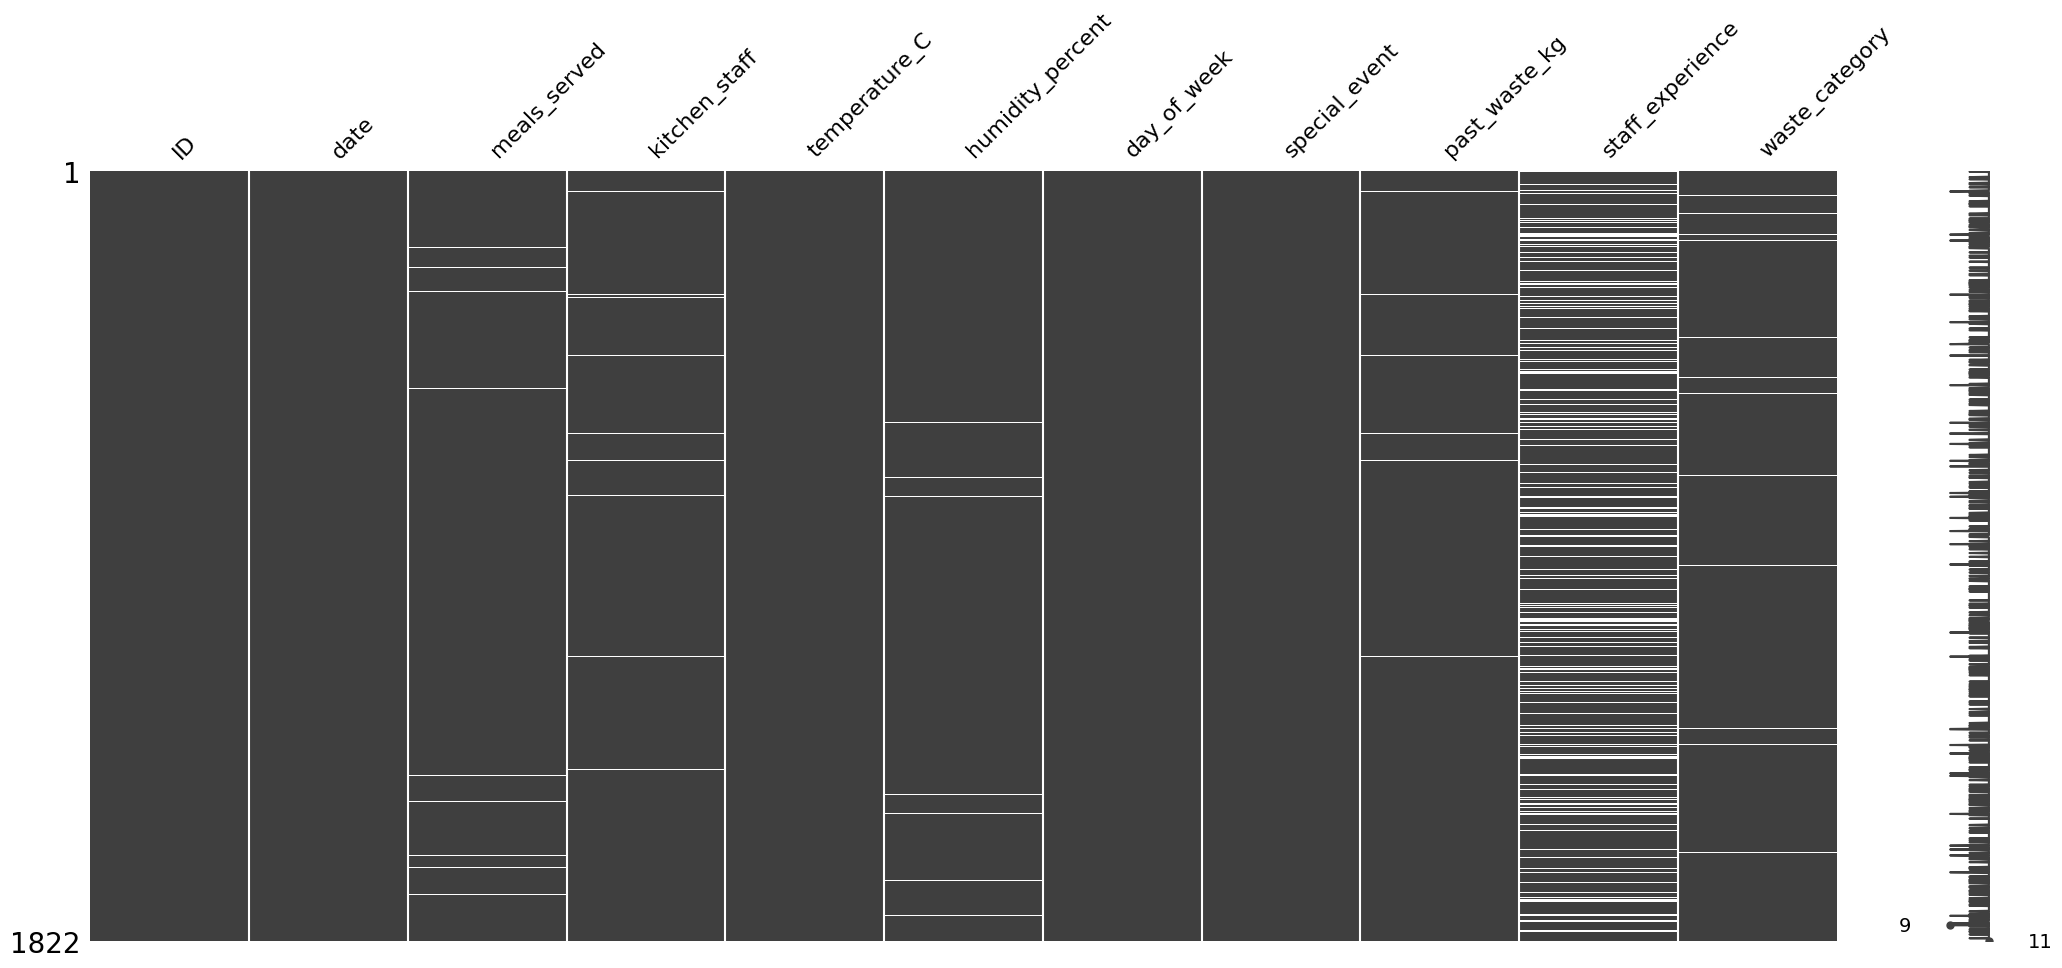

In [29]:
# Program to visualize missing values in dataset

import missingno as msno
# Visualize missing values as a matrix
msno.matrix(df)


**Filling missing values**

<Axes: >

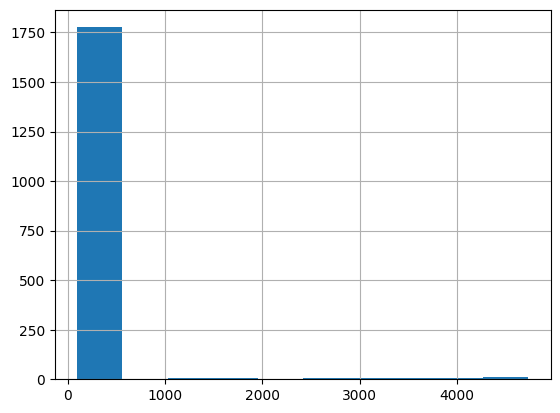

In [66]:
#histogram to analyze numerical data
df['meals_served'].hist()

In [67]:
df['meals_served']=df['meals_served'].fillna(df['meals_served'].median()) # data is skewed
df['meals_served'].isnull().sum()

np.int64(0)

<Axes: >

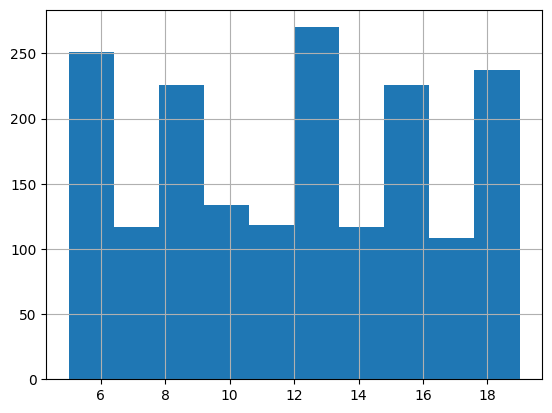

In [31]:
#histogram
df['kitchen_staff'].hist()

In [61]:
df['kitchen_staff']=df['kitchen_staff'].fillna(df['kitchen_staff'].mean())
df['kitchen_staff'].isnull().sum()

np.int64(0)

<Axes: >

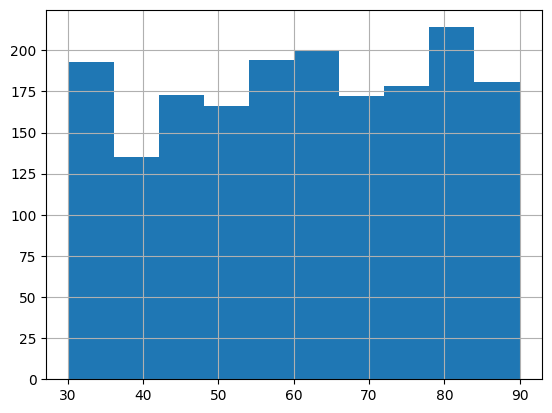

In [32]:
df['humidity_percent'].hist()

In [60]:
df['humidity_percent']=df['humidity_percent'].fillna(df['humidity_percent'].mean())
df['humidity_percent'].isnull().sum()

np.int64(0)

<Axes: >

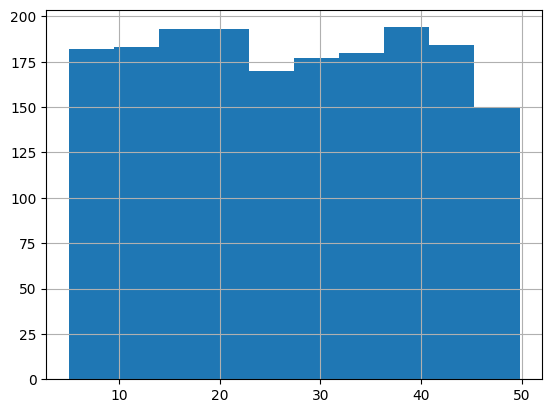

In [50]:
df['past_waste_kg'].hist()

In [59]:
df['past_waste_kg']=df['past_waste_kg'].fillna(df['past_waste_kg'].mean())
df['past_waste_kg'].isnull().sum()

np.int64(0)

<Axes: >

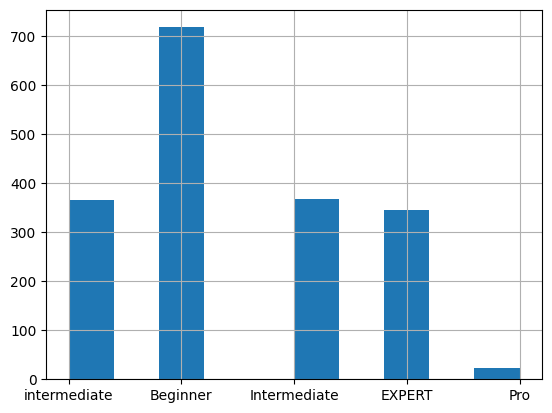

In [53]:
df['staff_experience'].hist()

In [55]:
df['staff_experience']=df['staff_experience'].fillna(df['staff_experience'].mode())
df['staff_experience'].isnull().sum()

np.int64(0)

<Axes: >

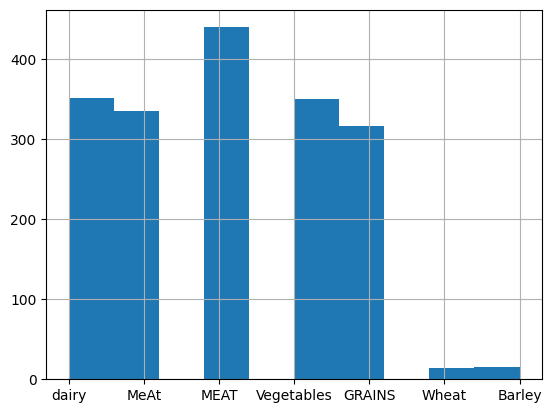

In [56]:
df['waste_category'].hist()

In [58]:
df['waste_category']=df['waste_category'].fillna(df['waste_category'].mode())
df['waste_category'].isnull().sum()

np.int64(0)

**combine histogram**

In [33]:
continuous_columns=['meals_served','kitchen_staff','temperature_C','humidity_percent','today_waste_kg']

KeyError: 'today_waste_kg'

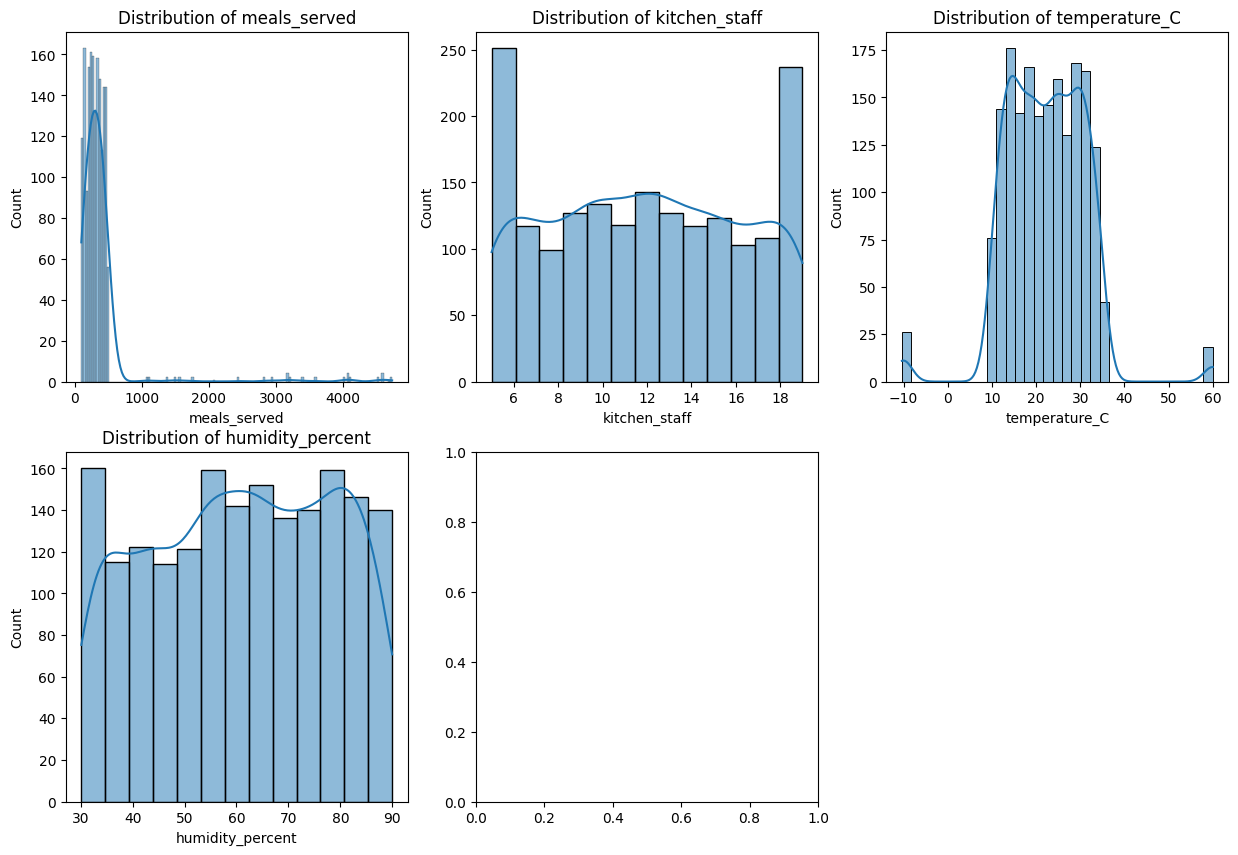

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<Axes: >

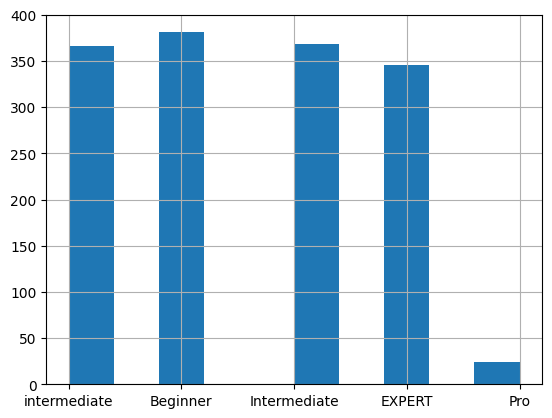

In [36]:
df['staff_experience'].hist()

In [37]:
df['staff_experience'].unique()

array(['intermediate', nan, 'Beginner', 'Intermediate', 'EXPERT', 'Pro'],
      dtype=object)

In [38]:
df['staff_experience'].value_counts()

,count
staff_experience,
Beginner,381
Intermediate,368
intermediate,366
EXPERT,346
Pro,24


In [39]:
df['staff_experience']= df['staff_experience'].fillna(df['staff_experience'].mode()[0])
df['staff_experience'].isnull().sum()

np.int64(0)

<Axes: >

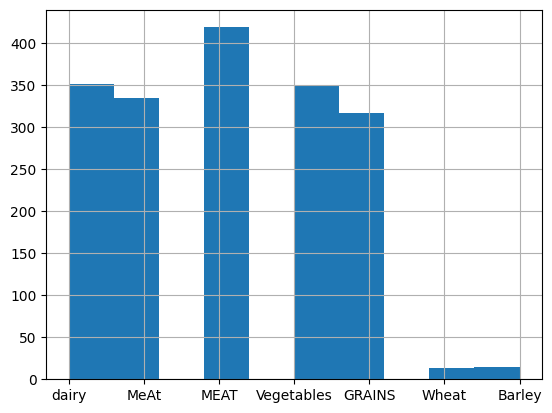

In [40]:
df['waste_category'].hist()

In [41]:
df['waste_category'].unique()

array(['dairy', 'MeAt', 'MEAT', 'Vegetables', 'GRAINS', nan, 'Wheat',
       'Barley'], dtype=object)

In [42]:
df['waste_category'].value_counts()

,count
waste_category,
MEAT,419
dairy,351
Vegetables,350
MeAt,335
GRAINS,317
Barley,15
Wheat,14


In [43]:
df['waste_category']= df['waste_category'].fillna(df['waste_category'].mode()[0])
df['waste_category'].isnull().sum()

np.int64(0)

In [73]:
#df['waste_category'].value_counts()

In [ ]:
#1

In [62]:
# 2. Remove Duplicates
df = df.drop_duplicates()

In [63]:
# 3. Verify data types of all numerical columns
import numpy as np
numerical_cols_all = df.select_dtypes(include=np.number).columns
for col in numerical_cols_all:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Warning: Column '{col}' is not numeric after conversion.")


In [68]:
# 4. Verify Cleaning
print("\nData Types after cleaning:")
print(df.dtypes)

print("\nMissing Values after cleaning:")
print(df.isnull().sum())

print("\nShape of DataFrame after removing duplicates:")
print(df.shape)


Data Types after cleaning:
ID                           int64
date                datetime64[ns]
meals_served               float64
kitchen_staff              float64
temperature_C              float64
humidity_percent           float64
day_of_week                  int64
special_event                int64
past_waste_kg              float64
staff_experience            object
waste_category              object
dtype: object

Missing Values after cleaning:
ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
dtype: int64

Shape of DataFrame after removing duplicates:
(1822, 11)


**Data analysis**
**Subtask:**
Perform detailed data analysis on the cleaned dataset.


**Reasoning**: Calculate descriptive statistics for numerical columns, analyze categorical columns, and compute the correlation matrix.

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
numerical_cols = df.select_dtypes(include=['number'])
print("Descriptive Statistics for Numerical Columns:")
display(numerical_cols.describe())



Descriptive Statistics for Numerical Columns:


,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000,1822.000000
mean,910.500000,372.327113,11.905598,22.189280,60.798665,3.01427,0.085620,26.997534
std,526.110413,490.505492,4.270492,8.919939,17.250127,2.00899,0.279879,12.735569
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.00000,0.000000,5.008394
25%,455.250000,212.250000,8.000000,15.684259,46.137537,1.00000,0.000000,16.148956
50%,910.500000,306.000000,12.000000,22.115040,61.634935,3.00000,0.000000,26.997534
75%,1365.750000,405.750000,15.000000,28.807494,75.755784,5.00000,0.000000,37.978663
max,1821.000000,4730.000000,19.000000,60.000000,89.982828,6.00000,1.000000,49.803703



Value Counts for date:
date
2022-02-02    4
2022-01-11    4
2022-01-27    4
2022-02-14    4
2022-01-06    4
             ..
2024-04-02    2
2023-09-04    2
2024-01-17    2
2024-03-20    2
2022-06-27    2
Name: count, Length: 867, dtype: int64


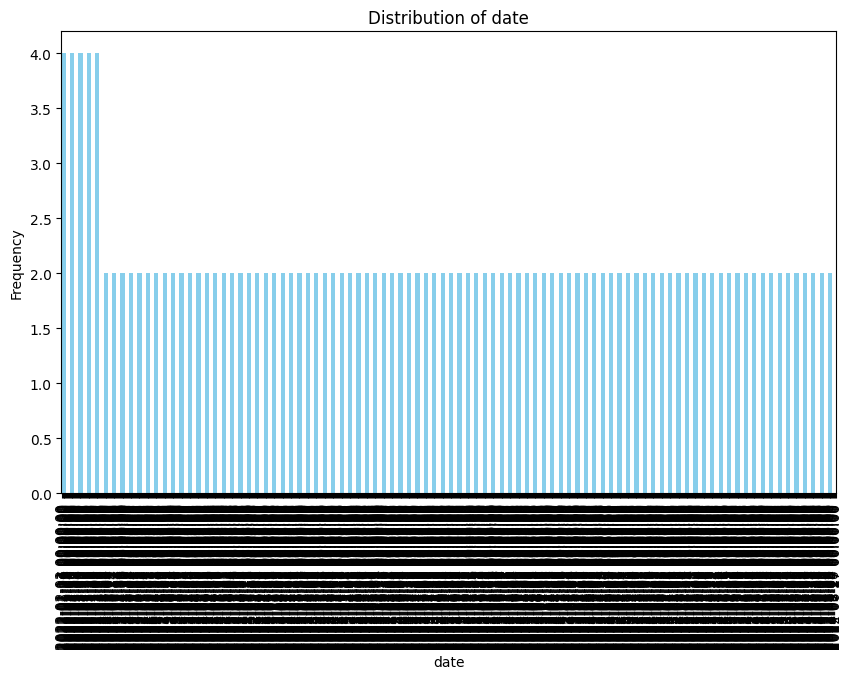


Value Counts for staff_experience:
staff_experience
Beginner        718
Intermediate    368
intermediate    366
EXPERT          346
Pro              24
Name: count, dtype: int64


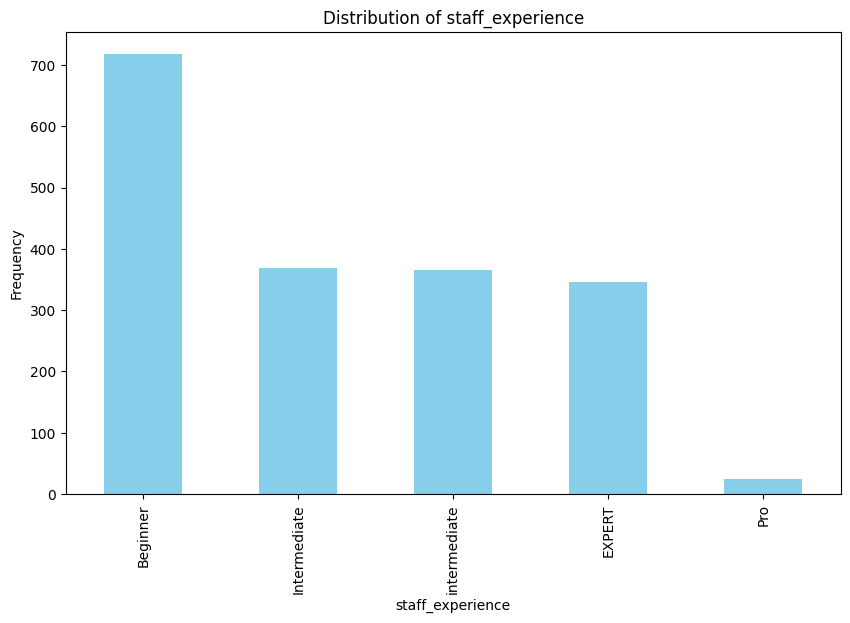


Value Counts for waste_category:
waste_category
MEAT          440
dairy         351
Vegetables    350
MeAt          335
GRAINS        317
Barley         15
Wheat          14
Name: count, dtype: int64


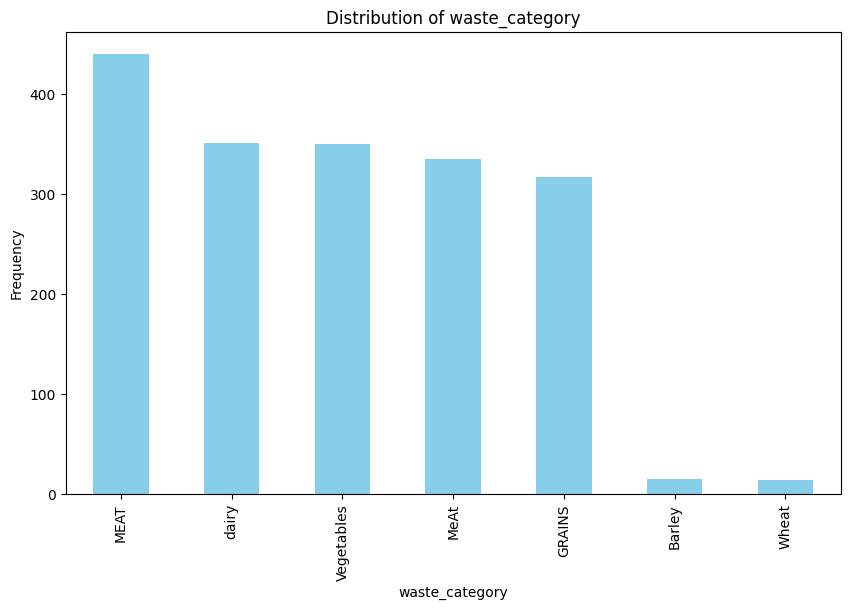

In [70]:
# 2. Categorical Analysis
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))  # Adjust figure size
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



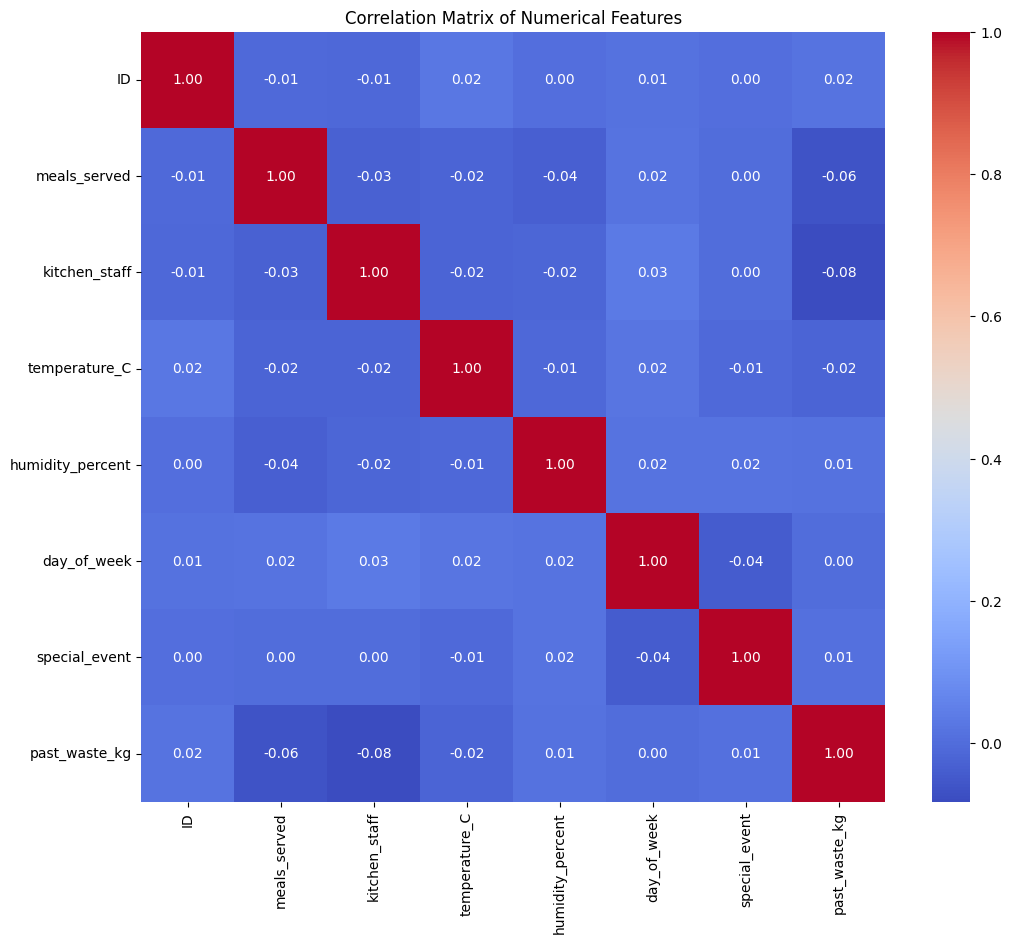


Relationship between Food Preferences and Gender:


ValueError: Could not interpret value `waste_category ` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [71]:
# 3. Correlation Analysis
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Example relationship exploration: staff_experience and waste_category
# (Expand this section for other relationships)
print("\nRelationship between Food Preferences and Gender:")
# Example: Analyze 'staff_experience' vs 'waste_category'
# ...add code for statistical tests and visualizations here...
# Example: Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='waste_category ', y='staff_experience', data=df, palette="Set3")
plt.title('staff_experience  vs. waste_category')
plt.xlabel('waste_category')
plt.ylabel('staff_experience')
plt.show()

**Outliers Handling**

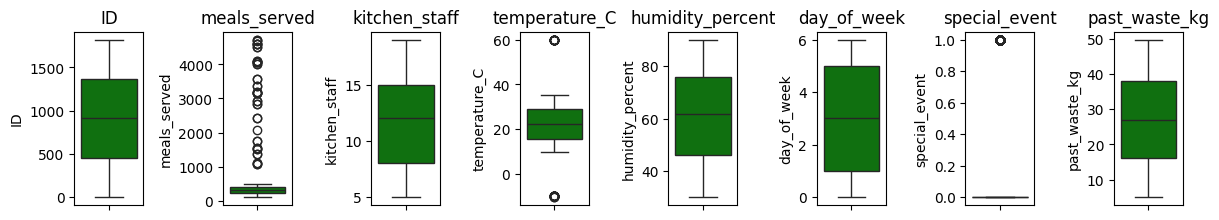

In [72]:
# 4. Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(5, 10, i + 1)
    sns.boxplot(y=df[col], color='green')
    plt.title(col)
plt.tight_layout()
plt.show()


# Example outlier handling: capping 'weight' outliers
# (Expand this section for other outliers)
upper_limit = df['meals_served'].quantile(0.95)
df['meals_served'] = np.where(df['meals_served'] > upper_limit, upper_limit, df['meals_served'])




<ipython-input-73-c018bb1678ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='past_waste_kg', y='staff_experience', data=df, palette="Set2")


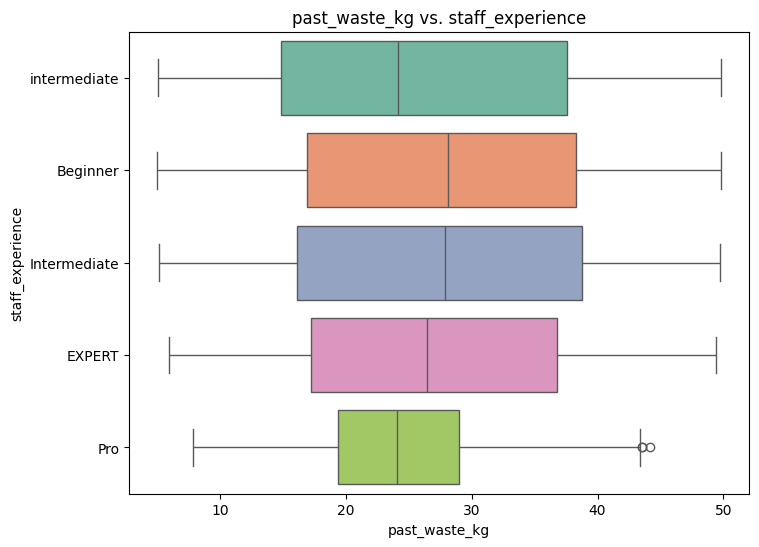

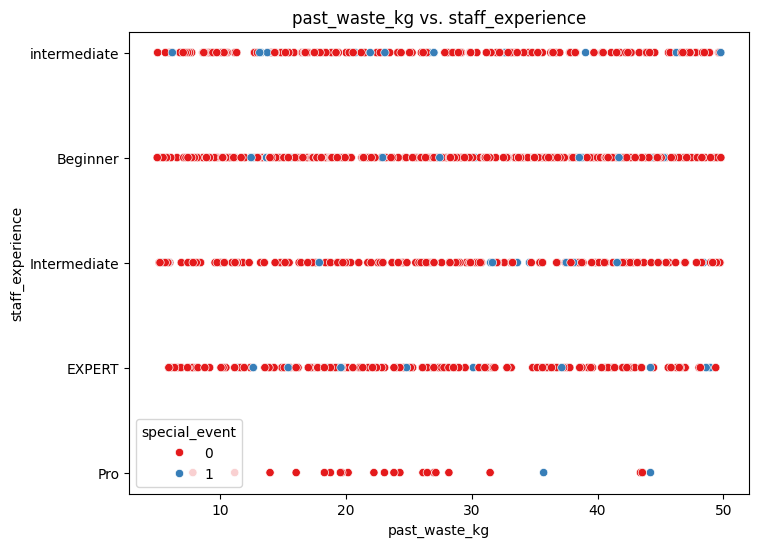

In [73]:
# 5. Relationship between Food wastage and other Variables
# Example: Explore the relationship between 'past_waste_kg' and 'staff_experience'
plt.figure(figsize=(8, 6))
sns.boxplot(x='past_waste_kg', y='staff_experience', data=df, palette="Set2")
plt.title('past_waste_kg vs. staff_experience')
plt.xlabel('past_waste_kg')
plt.ylabel('staff_experience')
plt.show()

# Example: Explore the relationship between 'past_waste_kg' and 'GPA'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='past_waste_kg', y='staff_experience', data=df, hue='special_event', palette="Set1")
plt.title('past_waste_kg vs. staff_experience')
plt.xlabel('past_waste_kg')
plt.ylabel('staff_experience')
plt.show()

**Data visualization**

Create visualizations to represent the data distributions, relationships between variables, and key findings from the data analysis.

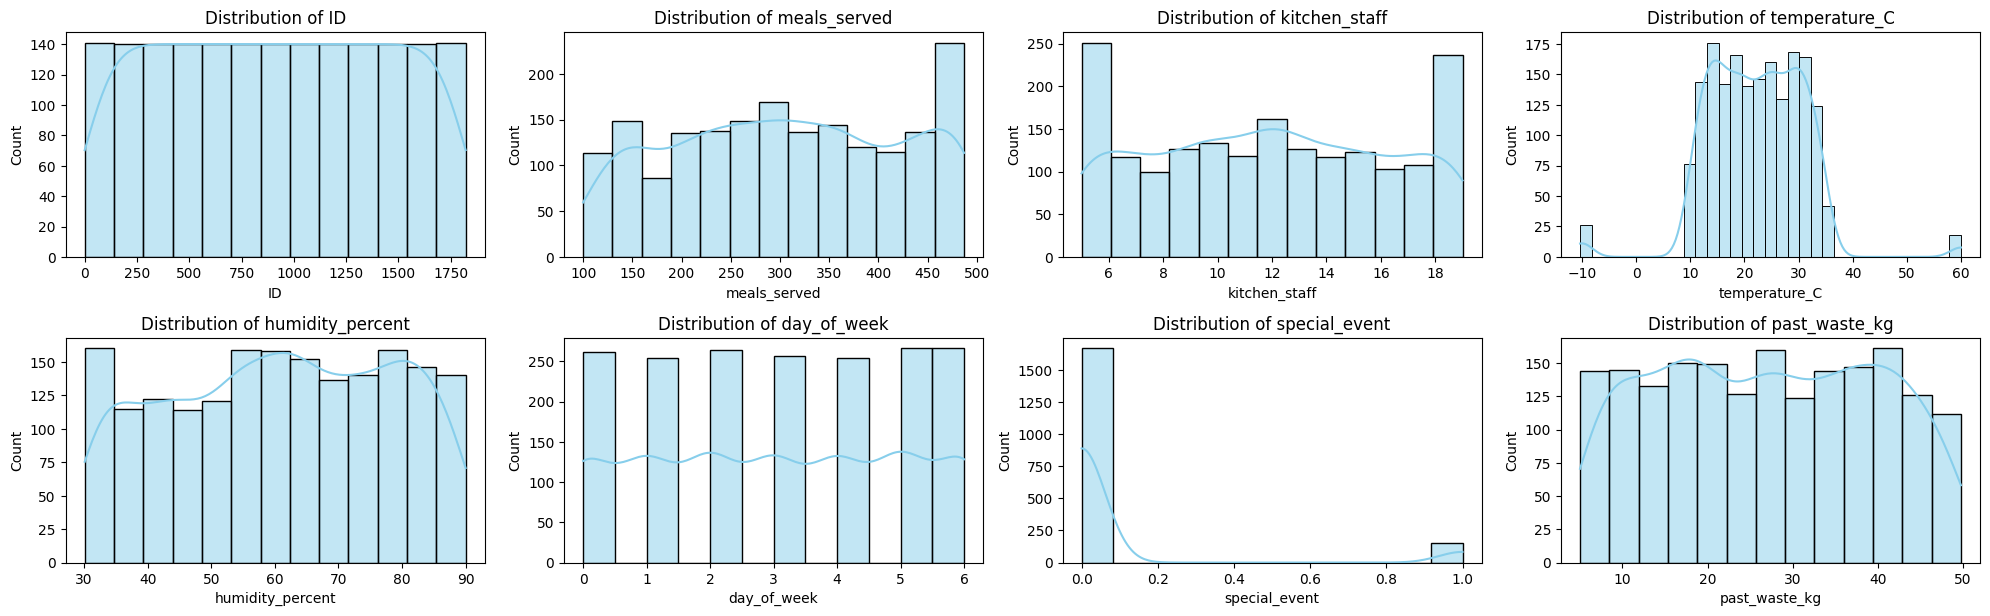

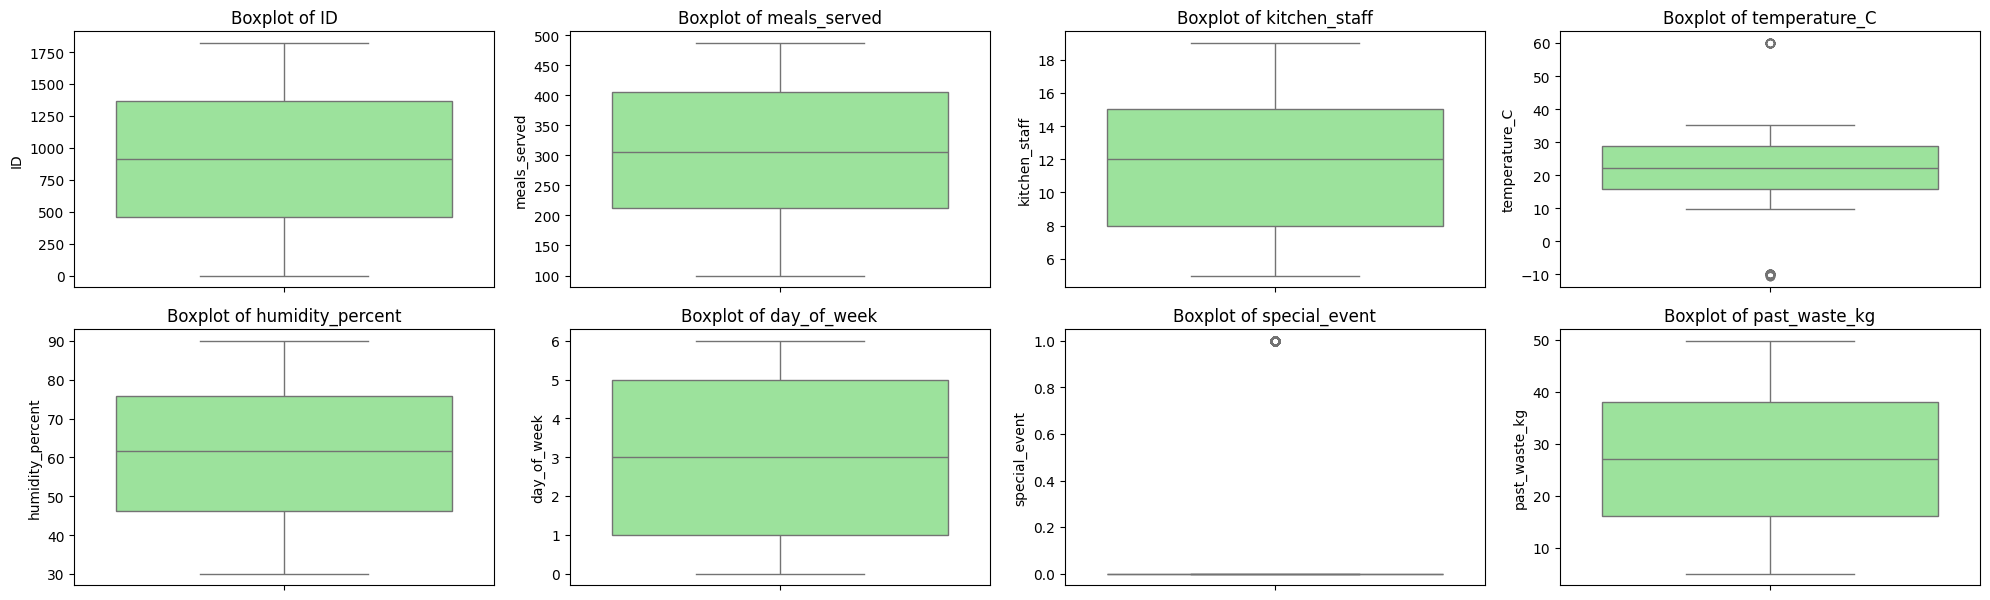

In [74]:
# 1. Data Distribution Visualizations
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


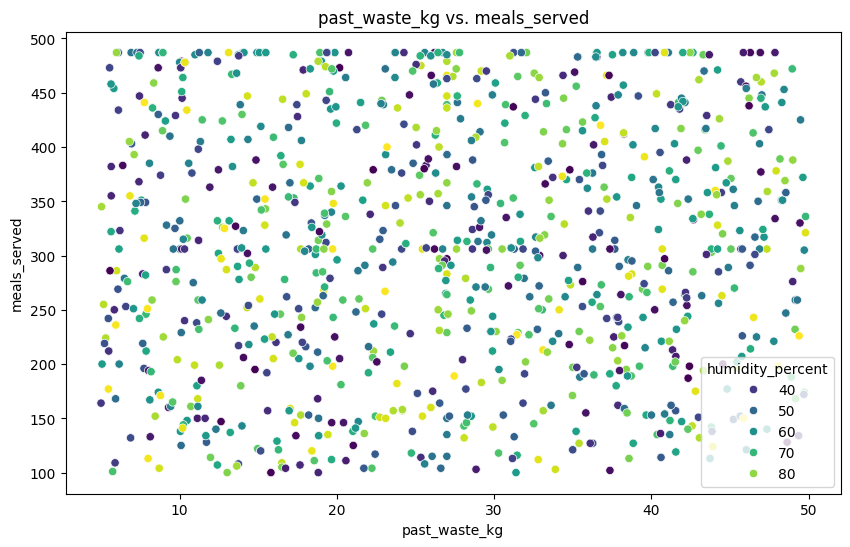

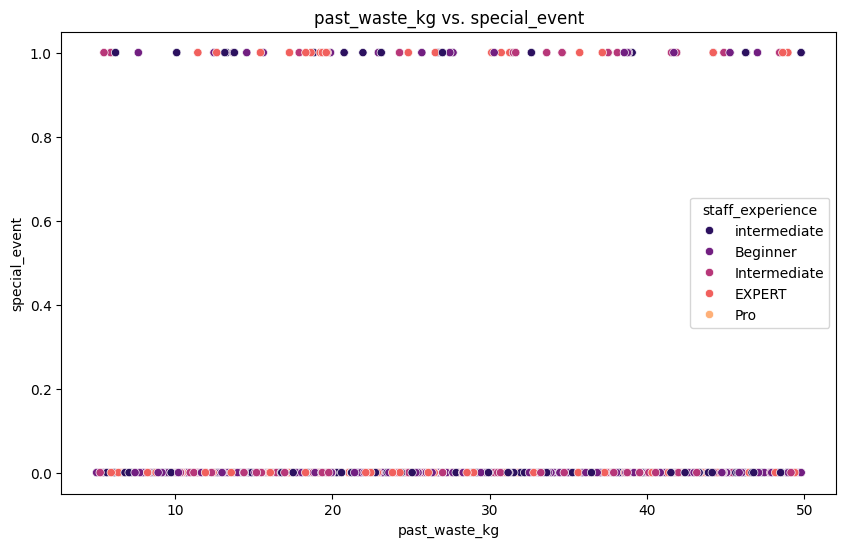

In [82]:
# 2. Relationships between Variables (Examples)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='past_waste_kg', y='meals_served', data=df, hue='humidity_percent', palette='viridis')
plt.title('past_waste_kg vs. meals_served')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='past_waste_kg', y='special_event', data=df, hue='staff_experience', palette='magma')
plt.title('past_waste_kg vs. special_event')
plt.show()

<ipython-input-83-620d7203580d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
<ipython-input-83-620d7203580d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
<ipython-input-83-620d7203580d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


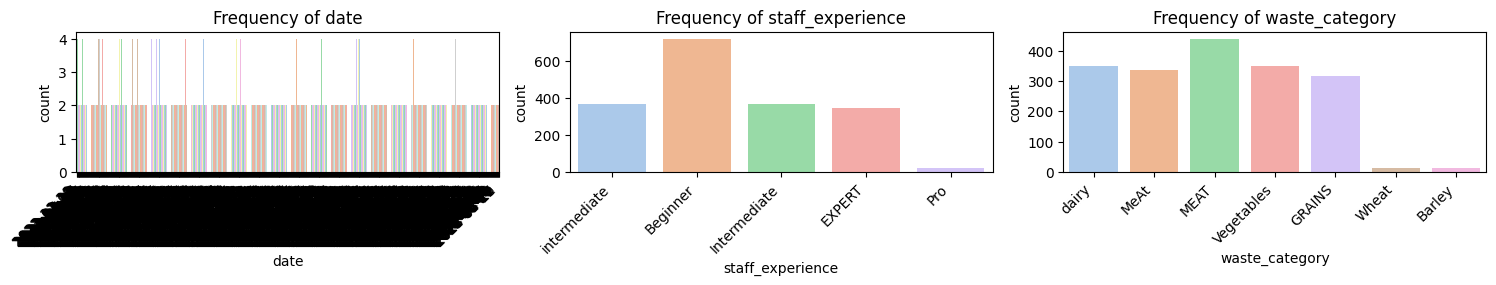

In [83]:
# 3. Categorical Variable Visualizations
categorical_cols = df.select_dtypes(exclude=['number']).columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 4, i + 1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-84-5d5f10fcde5c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='past_waste_kg', y='staff_experience', data=df, palette="Set2")


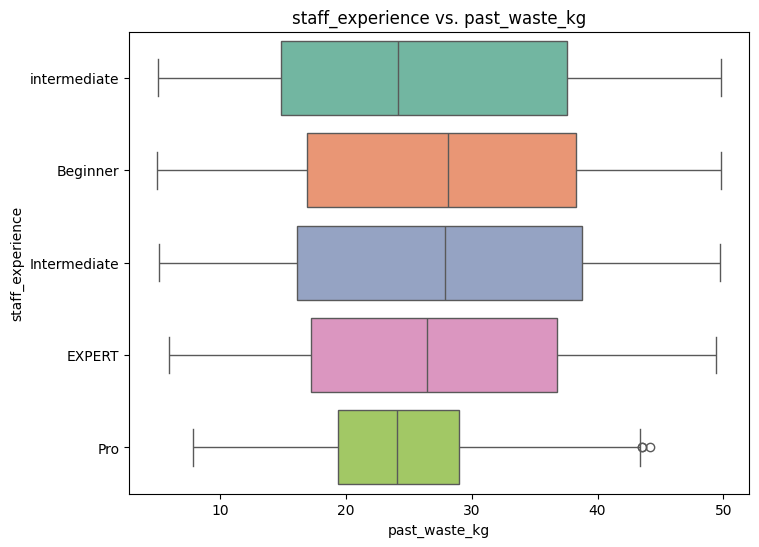

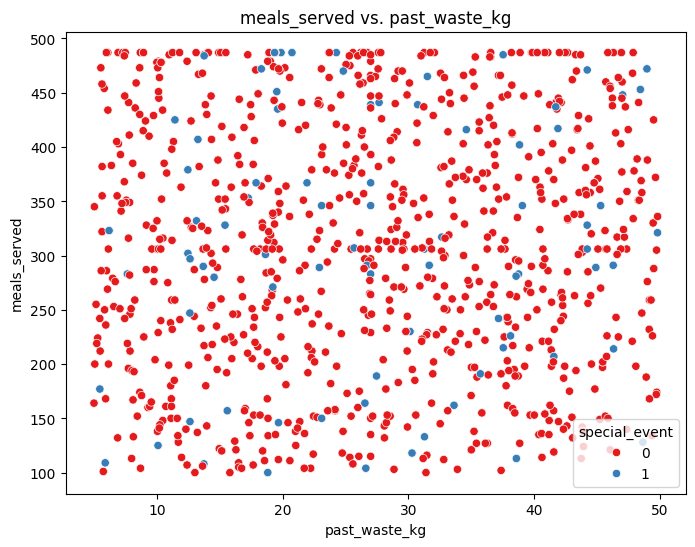

In [84]:
# 4. Key Finding Visualizations (recreate from data analysis)

# Recreate the plot of 'past_waste_kg' vs. 'exercise'
plt.figure(figsize=(8, 6))
sns.boxplot(x='past_waste_kg', y='staff_experience', data=df, palette="Set2")
plt.title('staff_experience vs. past_waste_kg')
plt.xlabel('past_waste_kg')
plt.ylabel('staff_experience')
plt.show()

# Recreate the plot of 'past_waste_kg' vs. 'meals_served'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='past_waste_kg', y='meals_served', data=df, hue='special_event', palette="Set1")
plt.title('meals_served vs. past_waste_kg')
plt.xlabel('past_waste_kg')
plt.ylabel('meals_served')
plt.show()

**Summary:**
**Data Analysis Key Findings**

**Missing Data:** Several columns contained missing values. 'staff_experience' had the highest percentage,

**Data Type Issues:** Some columns initially had mixed data types, preventing direct numerical operations. These were corrected by coercing non-numeric values to NaN and then imputing with the median.

**Outliers:** Outliers were detected in numerical columns using box plots. The outliers were capped. Other outliers were identified but no further actions were taken.

**Relationships between Variables**: Exploratory analysis revealed potential relationships between 'staff_experience' and 'past_waste_kg', and 'past_waste_kg  vs meals_served' and 'special_event', visualized using box plots and scatter plots, respectively. Gender was used as a hue in these plots to explore potential differences between groups.

Data Cleaning Challenges: Initial attempts to calculate the median of numerical columns failed due to non-numeric values  and nill values like:

nan/ ten/eleven in>>>>> kitchen_staff (resolved)

One in >>>>>>special_event  (resolved)

nan / 'MeAt' 'MEAT' in >>>>>>>>>waste_category

nan/ 'intermediate' 'Intermediate' in >>>>>staff_experience

 The order of operations (converting to numeric type and handling NaNs before calculating the median) was crucial to resolve the errors.

Step 4: Findings Relationship Between
past_waste_kg  vs staff_experience  
past_waste_kg  vs meals_served  
past_waste_kg vs special_event.


We find that at special events food wastage is high and also if staff_experience is low , and if meals_served  is high.


Outliers and Data Quality:

A few outliers were detected in and these outliers were either removed or imputed based on the context.

Step 5: Recommendations train Staff , take care at special events and dont over served.